In [1]:
##########第一步
import numpy as np
import pandas as pd
import mne
from mne.preprocessing import ICA
from mne.time_frequency import tfr_morlet
data_path = r"E:\ganhuo\23.6\naodian\6.30zaoshang\data.bdf"
raw = mne.io.read_raw_bdf(data_path, preload=True)

Extracting EDF parameters from E:\ganhuo\23.6\naodian\6.30zaoshang\data.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7225999  =      0.000 ...  7225.999 secs...


In [1]:
import numpy as np
import pandas as pd
import mne
from mne.preprocessing import ICA
from mne.time_frequency import tfr_morlet
data_path1 = r"E:\ganhuo\23.6\naodian\6.18.120min.afternoon\1\data.bdf"
data_path2 = r"E:\ganhuo\23.6\naodian\6.18.120min.afternoon\2\data.bdf"
raw1 = mne.io.read_raw_bdf(data_path1, preload=True)
raw2 = mne.io.read_raw_bdf(data_path2, preload=True)
raw1.append(raw2) 

Extracting EDF parameters from E:\ganhuo\23.6\naodian\6.18.120min.afternoon\1\data.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4169999  =      0.000 ...  4169.999 secs...
Extracting EDF parameters from E:\ganhuo\23.6\naodian\6.18.120min.afternoon\2\data.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3088999  =      0.000 ...  3088.999 secs...


In [2]:
print(raw1)
print(raw1.info)

<RawEDF | data.bdf, 64 x 7259000 (7259.0 s), ~3.46 GB, data loaded>
<Info | 7 non-empty values
 bads: []
 ch_names: Fpz, Fp1, Fp2, AF3, AF4, AF7, AF8, Fz, F1, F2, F3, F4, F5, F6, ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: 2023-06-18 14:48:38 UTC
 nchan: 64
 projs: []
 sfreq: 1000.0 Hz
>


In [2]:
print(raw)
print(raw.info)

<RawEDF | data.bdf, 64 x 7226000 (7226.0 s), ~3.45 GB, data loaded>
<Info | 7 non-empty values
 bads: []
 ch_names: Fpz, Fp1, Fp2, AF3, AF4, AF7, AF8, Fz, F1, F2, F3, F4, F5, F6, ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: 2023-06-30 09:34:05 UTC
 nchan: 64
 projs: []
 sfreq: 1000.0 Hz
>


In [4]:
raw.info.ch_names

['Fpz',
 'Fp1',
 'Fp2',
 'AF3',
 'AF4',
 'AF7',
 'AF8',
 'Fz',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'F6',
 'F7',
 'F8',
 'FCz',
 'FC1',
 'FC2',
 'FC3',
 'FC4',
 'FC5',
 'FC6',
 'FT7',
 'FT8',
 'Cz',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'T7',
 'T8',
 'CP1',
 'CP2',
 'CP3',
 'CP4',
 'CP5',
 'CP6',
 'TP7',
 'TP8',
 'Pz',
 'P3',
 'P4',
 'P5',
 'P6',
 'P7',
 'P8',
 'POz',
 'PO3',
 'PO4',
 'PO5',
 'PO6',
 'PO7',
 'PO8',
 'Oz',
 'O1',
 'O2',
 'ECG',
 'HEOR',
 'HEOL',
 'VEOU',
 'VEOL']

#######################挑选电极###################

In [ ]:
import mne
montage = mne.channels.make_standard_montage('standard_1020')
channel_name=(['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8',
                                 'T7', 'C3', 'Cz', 'C4', 'T8',
                                 'P7', 'P3', 'Pz', 'P4',
                                 'P8',
                                 'O1',
                                 'O2',
                                 'A1',
                                 'A2',
                                 'M1',
                                 'M2',
                                 'AFz',
                                 'CPz',
                                 'POz',
                                 'FC1',
                                 'FC2',
                                 'CP1',
                                 'CP2',
                                 'FC5',
                                 'FC6'])
raw.set_montage(montage)
raw1020=raw.pick_channels(channel_name)

In [33]:
print(raw1020.info.ch_names)

['Fp1', 'Fp2', 'Fz', 'F3', 'F4', 'F7', 'F8', 'FC1', 'FC2', 'FC5', 'FC6', 'Cz', 'C3', 'C4', 'T7', 'T8', 'CP1', 'CP2', 'Pz', 'P3', 'P4', 'P7', 'P8', 'POz', 'O1', 'O2']


#########直接用biosemi32###############

In [3]:
########第二步

# 创建一个biosemi32类型的montage对象
montage = mne.channels.make_standard_montage(kind='biosemi32', head_size=0.095)

# 获取montage中的通道名称
ch_names = montage.ch_names

# 从raw中选择通道
raw.pick_channels(ch_names)

# 查看选择后的通道信息
print(raw.info)
raw.set_montage(montage)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-290bb827b575>:10: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  raw.pick_channels(ch_names)


<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, Fp2, AF3, AF4, Fz, F3, F4, F7, F8, FC1, FC2, FC5, FC6, Cz, ...
 chs: 32 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: 2023-06-30 09:34:05 UTC
 nchan: 32
 projs: []
 sfreq: 1000.0 Hz
>


<RawEDF | data.bdf, 32 x 7226000 (7226.0 s), ~1.72 GB, data loaded>

In [5]:
########第二步（合并bdf的选）

# 创建一个biosemi32类型的montage对象
montage = mne.channels.make_standard_montage(kind='biosemi32', head_size=0.095)

# 获取montage中的通道名称
ch_names = montage.ch_names

# 从raw中选择通道
raw1.pick_channels(ch_names)

# 查看选择后的通道信息
print(raw1.info)
raw1.set_montage(montage)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-5-72dbc79b54d5>:10: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  raw1.pick_channels(ch_names)


<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, Fp2, AF3, AF4, Fz, F3, F4, F7, F8, FC1, FC2, FC5, FC6, Cz, ...
 chs: 32 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: 2023-06-18 14:48:38 UTC
 nchan: 32
 projs: []
 sfreq: 1000.0 Hz
>


<RawEDF | data.bdf, 32 x 7259000 (7259.0 s), ~1.73 GB, data loaded>

In [6]:
montage

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 32 channels>

In [3]:
#########第三步
# 获取Montage对象
montage = raw.get_montage()

# 获取电极位置字典
pos_dict = montage.get_positions()

# 获取通道名称和位置的字典
ch_pos = pos_dict['ch_pos']

# 将字典的值转换为numpy数组
pos_array = np.array(list(ch_pos.values()))

# 提取x和y坐标
electrode_locations = np.take(pos_array, [0, 1], axis=1)
print(electrode_locations)

[[-2.93387312e-02  9.02953300e-02]
 [ 2.93387312e-02  9.02953300e-02]
 [-3.85934410e-02  8.27639012e-02]
 [ 3.85934410e-02  8.27639012e-02]
 [ 4.18445162e-18  6.83372810e-02]
 [-5.17757073e-02  6.39376738e-02]
 [ 5.17757073e-02  6.39376738e-02]
 [-7.68097955e-02  5.58055830e-02]
 [ 7.68097955e-02  5.58055830e-02]
 [-3.55974030e-02  3.55974030e-02]
 [ 3.55974030e-02  3.55974030e-02]
 [-8.43493361e-02  3.23786765e-02]
 [ 8.43493361e-02  3.23786765e-02]
 [ 0.00000000e+00  0.00000000e+00]
 [-6.83372810e-02 -4.18445162e-18]
 [ 6.83372810e-02  4.18445162e-18]
 [-9.49421286e-02 -5.81352869e-18]
 [ 9.49421286e-02  5.81352869e-18]
 [-3.55974030e-02 -3.55974030e-02]
 [ 3.55974030e-02 -3.55974030e-02]
 [-8.43493361e-02 -3.23786765e-02]
 [ 8.43493361e-02 -3.23786765e-02]
 [ 4.18445162e-18 -6.83372810e-02]
 [-5.17757073e-02 -6.39376738e-02]
 [ 5.17757073e-02 -6.39376738e-02]
 [-7.68097955e-02 -5.58055830e-02]
 [ 7.68097955e-02 -5.58055830e-02]
 [-3.85934410e-02 -8.27639012e-02]
 [ 3.85934410e-02 -8

In [6]:
#########第三步（合并bdf的选）
# 获取Montage对象
montage = raw1.get_montage()

# 获取电极位置字典
pos_dict = montage.get_positions()

# 获取通道名称和位置的字典
ch_pos = pos_dict['ch_pos']

# 将字典的值转换为numpy数组
pos_array = np.array(list(ch_pos.values()))

# 提取x和y坐标
electrode_locations = np.take(pos_array, [0, 1], axis=1)
print(electrode_locations)

[[-2.93387312e-02  9.02953300e-02]
 [ 2.93387312e-02  9.02953300e-02]
 [-3.85934410e-02  8.27639012e-02]
 [ 3.85934410e-02  8.27639012e-02]
 [ 4.18445162e-18  6.83372810e-02]
 [-5.17757073e-02  6.39376738e-02]
 [ 5.17757073e-02  6.39376738e-02]
 [-7.68097955e-02  5.58055830e-02]
 [ 7.68097955e-02  5.58055830e-02]
 [-3.55974030e-02  3.55974030e-02]
 [ 3.55974030e-02  3.55974030e-02]
 [-8.43493361e-02  3.23786765e-02]
 [ 8.43493361e-02  3.23786765e-02]
 [ 0.00000000e+00  0.00000000e+00]
 [-6.83372810e-02 -4.18445162e-18]
 [ 6.83372810e-02  4.18445162e-18]
 [-9.49421286e-02 -5.81352869e-18]
 [ 9.49421286e-02  5.81352869e-18]
 [-3.55974030e-02 -3.55974030e-02]
 [ 3.55974030e-02 -3.55974030e-02]
 [-8.43493361e-02 -3.23786765e-02]
 [ 8.43493361e-02 -3.23786765e-02]
 [ 4.18445162e-18 -6.83372810e-02]
 [-5.17757073e-02 -6.39376738e-02]
 [ 5.17757073e-02 -6.39376738e-02]
 [-7.68097955e-02 -5.58055830e-02]
 [ 7.68097955e-02 -5.58055830e-02]
 [-3.85934410e-02 -8.27639012e-02]
 [ 3.85934410e-02 -8

Using matplotlib as 2D backend.


D:\1yanjiushengwenxian\python\anaconda\anacondaold\lib\site-packages\matplotlib\colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


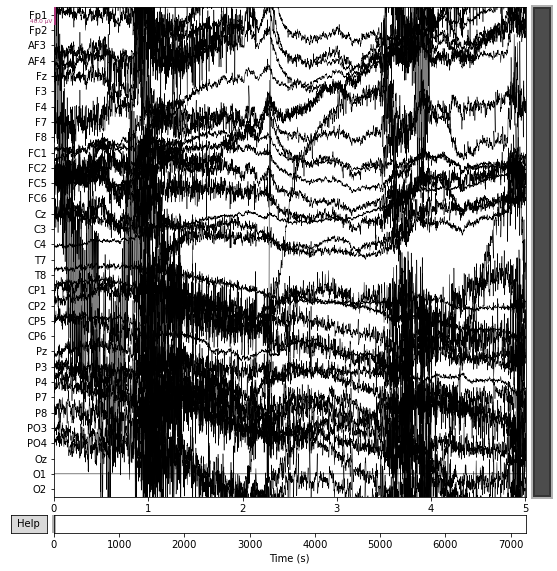

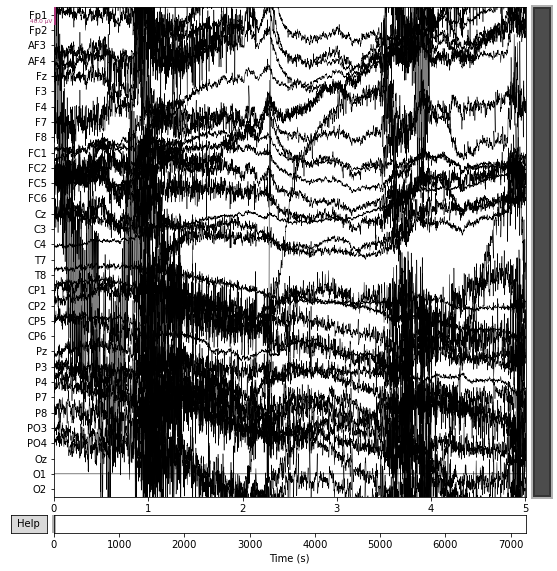

In [4]:
#可视化原始数据
raw.plot(duration=5, n_channels=32, clipping=None)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.048 (s)


<ipython-input-6-4a5c71cafd81>:2: UserWarning: Zero value in spectrum for channel O1
  raw.plot_psd(average=True)
<ipython-input-6-4a5c71cafd81>:2: UserWarning: Infinite value in PSD for channel O1.
These channels might be dead.
  raw.plot_psd(average=True)
D:\1yanjiushengwenxian\python\anaconda\anacondaold\lib\site-packages\mne\viz\utils.py:151: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


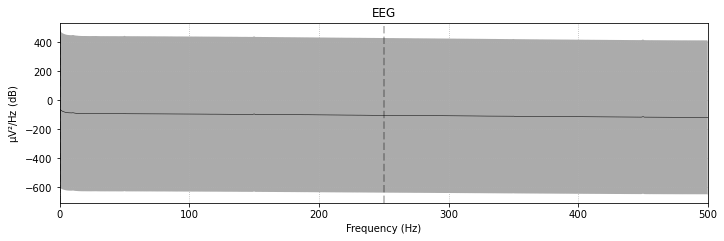

In [6]:
#绘制原始数据功率谱图 
raw.plot_psd(average=True)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 10.240 (s)


D:\1yanjiushengwenxian\python\anaconda\anacondaold\lib\site-packages\mne\viz\utils.py:151: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


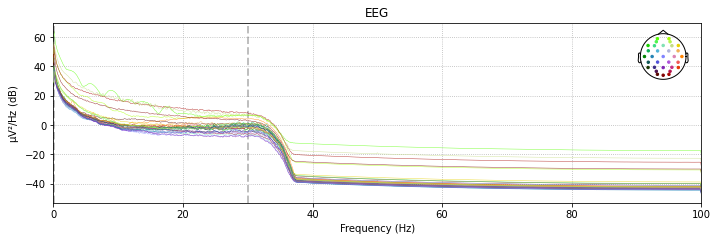

In [26]:
raw.plot_psd(picks='eeg')

NOTE: plot_psd_topomap() is a legacy function. New code should use .compute_psd().plot_topomap().
Effective window size : 10.240 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


converting legacy list-of-tuples input to a dict for the `bands` parameter


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s finished


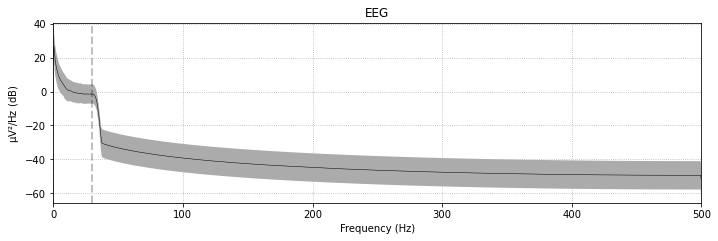

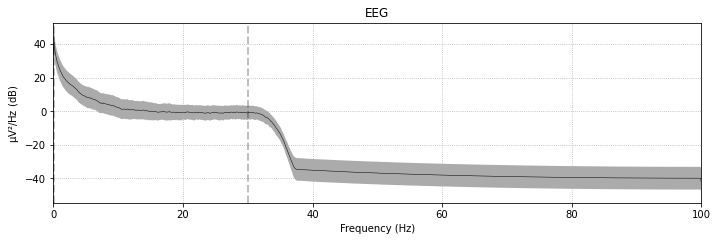

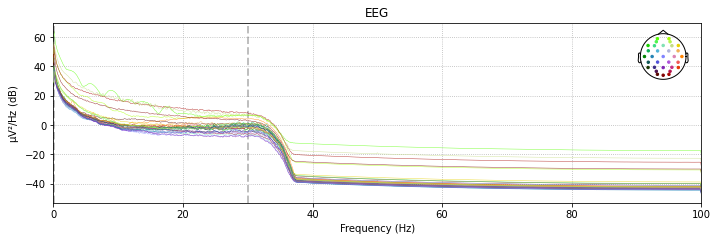

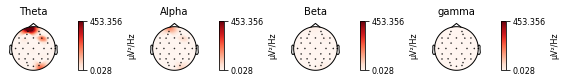

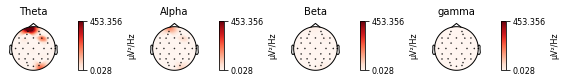

In [28]:
bands = [(4, 8, 'Theta'), (8, 12, 'Alpha'), (12, 30, 'Beta'), (30, 49, 'gamma')]
raw.plot_psd_topomap(bands=bands, vlim='joint')

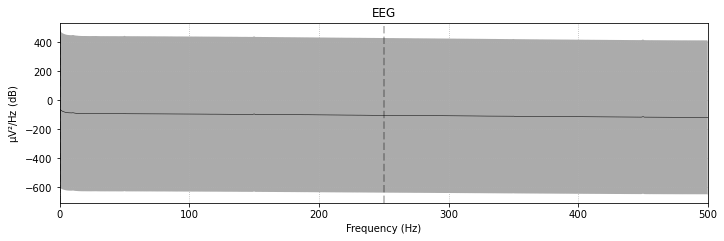

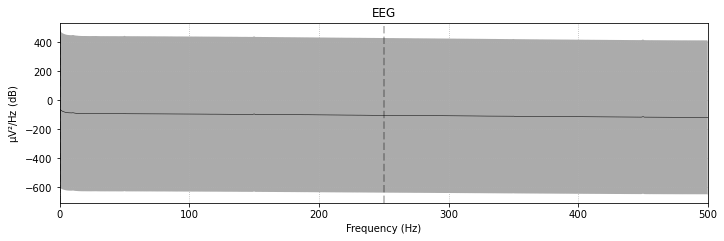

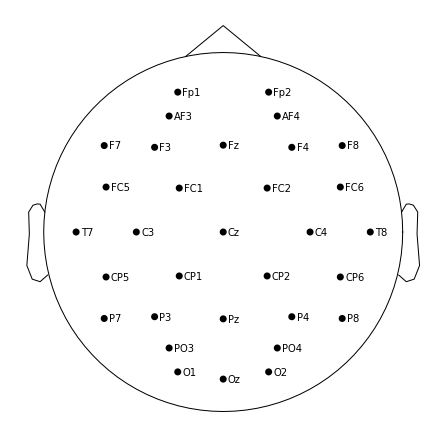

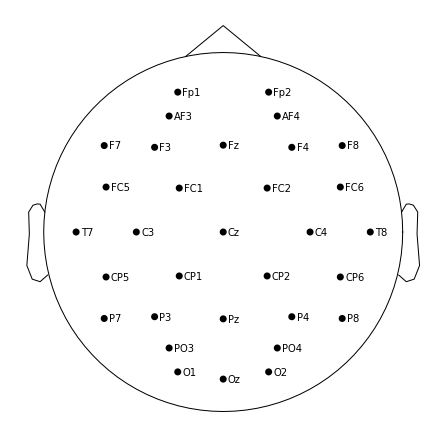

In [7]:
#绘制电极拓扑图
raw.plot_sensors(ch_type='eeg', show_names=True)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 33001 samples (33.001 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:   14.2s finished


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.048 (s)


D:\1yanjiushengwenxian\python\anaconda\anacondaold\lib\site-packages\mne\viz\utils.py:151: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


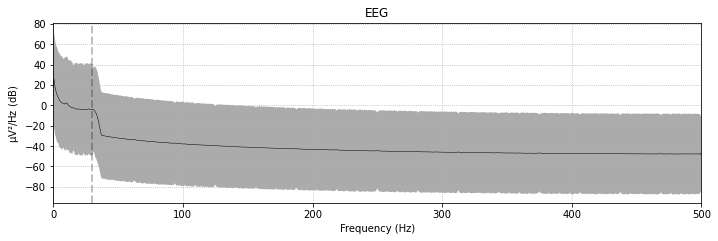

In [8]:
###########第四步
#通过功率谱图判断到60Hz处可能存在环境噪⾳
#raw = raw.notch_filter(freqs=(60))
raw = raw.filter(l_freq=0.1, h_freq=30)
raw.plot_psd(average=True)

MNE中可以通过打开交互式数据地形图界⾯，⼿动进⾏坏段标记
fig = raw.plot(duration=5, n_channels=32, clipping=None)
fig.canvas.key_press_event('a')
按a就可以打开这个GUI⼩窗⼝，add new label可以添加⼀个⽤于标记坏段的marker
在MNE中，并不会将坏段直接删掉，⽽是进⾏了数据标记
在之后的数据处理中，
将进⾏数据处理的函数中的参数reject_by_annotation设为True即可在处理过程中⾃动排除标记的⽚段
如果遇到GUI窗⼝⽆法弹出，需在脚本开头添加如下代码：
import matplotlib
matplotlib.use('TkAgg')

去坏道
MNE中坏的导联也不是直接删掉，也是通过对坏道进⾏'bads'标记
在这个例⼦中，假定导联'FC5'为坏道，则把'FC5'进⾏坏道标记
坏道标记
raw.info['bads'].append('FC5')
#打印出当前的坏道
print(raw.info['bads'])
如若'FC5'和'C3'都为坏道，则通过下述代码标记：
raw.info['bads'].extend(['FC5', 'C3'])

如若'FC5'和'C3'都为坏道，则通过下述代码标记：
raw.info['bads'].extend(['FC5', 'C3'])
raw = raw.interpolate_bads()
进⾏信号重建后会默认把坏掉的'bads'标记去掉
如果不想去掉对原坏道的标记，则将reset_bads参数设为False即可，
对应代码如下：
raw = raw.interpolate_bads(reset_bads=False)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 3301 samples (3.301 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    5.1s finished


Fitting ICA to data using 32 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 32 components
Fitting ICA took 355.5s.
Creating RawArray with float64 data, n_channels=32, n_times=5158000
    Range : 0 ... 5157999 =      0.000 ...  5157.999 secs
Ready.


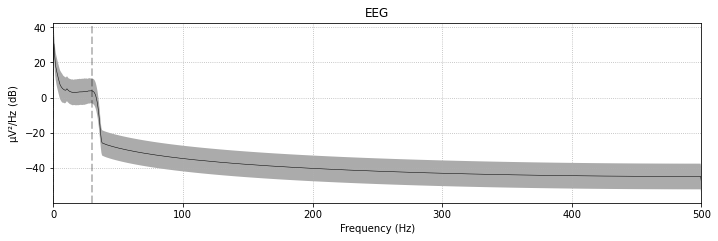

D:\1yanjiushengwenxian\python\anaconda\anacondaold\lib\site-packages\matplotlib\colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


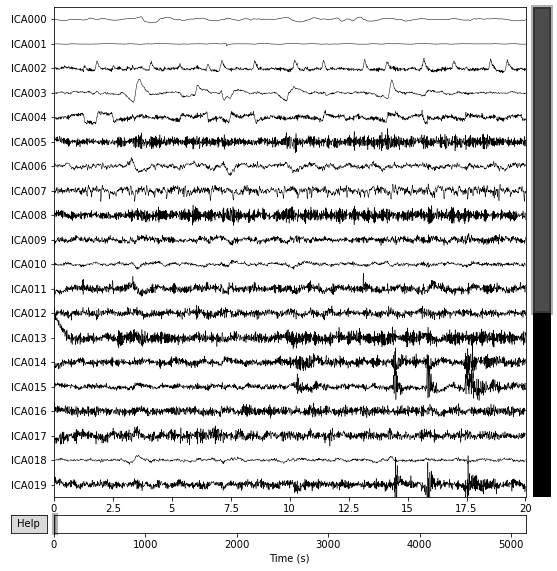

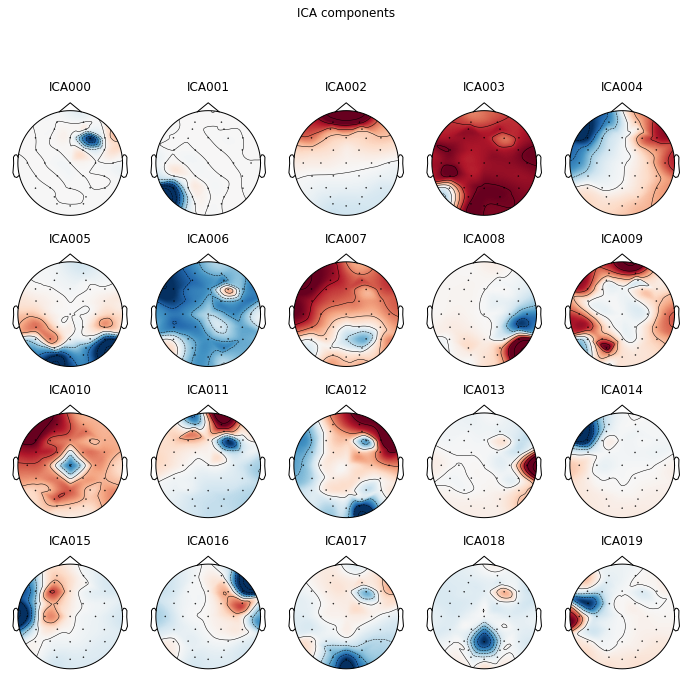

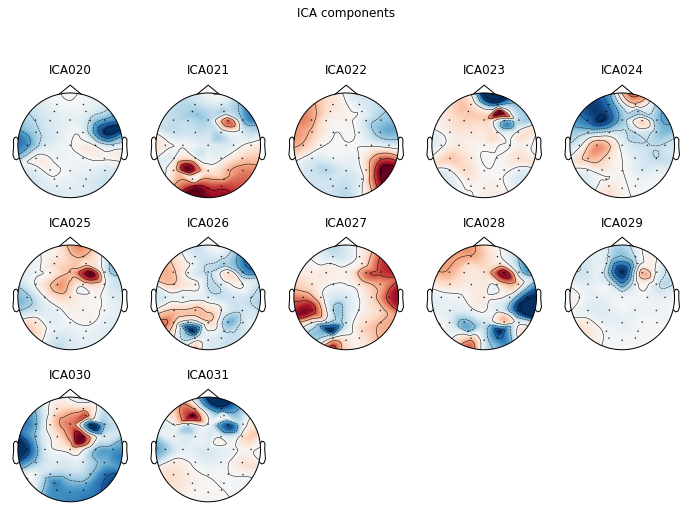

[<MNEFigure size 702x696.24 with 20 Axes>,
 <MNEFigure size 702x526.68 with 12 Axes>]

In [12]:
#################第五步

#独立主成分分析去除眼电心电噪声
#这⾥对⾼通1Hz的数据进⾏ICA及相关成分剔除，再应⽤到⾼通0.1Hz的数据上
ica = ICA(max_iter='auto')
raw_for_ica = raw.copy().filter(l_freq=1, h_freq=None)
ica.fit(raw_for_ica)
#这没有设定n_components，即ICA的成分数让MNE的ICA分析器⾃动去选择
# 类似EEGLAB，如果希望ICA的成分数为固定个数，可以⾃定义设置（n_components<=n_channels）
# 以30个独⽴成分为例，对应代码改为如下即可：
# ica = ICA(n_components=30, max_iter='auto')


#绘制各成分的时序信号图
ica.plot_sources(raw_for_ica)

# 绘制各成分地形图
ica.plot_components()

In [ ]:
# 查看去掉某⼀成分前后信号差异
# 这⾥以去掉第2个成分（即ICA001）为例
ica.plot_overlay(raw_for_ica, exclude=[1])

# 可视化第2个成分（ICA001）和第17个成分（ICA016）
ica.plot_properties(raw, picks=[1, 16])

In [ ]:
# 设定要剔除的成分序号
ica.exclude = [1]
# 应⽤到脑电数据上
ica.apply(raw)
# 绘制ICA后的数据波形图
raw.plot(duration=5, n_channels=32, clipping=None)

In [9]:
##########第六步

# 若使⽤平均参考，则使⽤以下代码：
raw.set_eeg_reference(ref_channels='average')

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


<RawEDF | data.bdf, 32 x 7226000 (7226.0 s), ~1.72 GB, data loaded>

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 10.240 (s)


D:\1yanjiushengwenxian\python\anaconda\anacondaold\lib\site-packages\mne\viz\utils.py:151: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


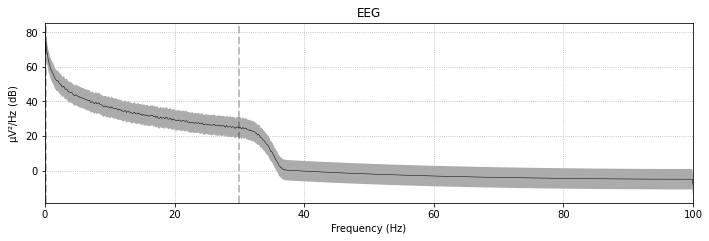

In [10]:
#######第七步

# 重采样Resample to 200 Hz
raw_resampled = raw.resample(200)
# Plot PSD of the resampled signal
raw_resampled.plot_psd(average=True)

In [11]:
# 获取采样频率
sfreq = raw.info['sfreq']

# 打印采样频率
print(sfreq)

200.0


In [12]:
############第八步

# 获取raw对象中的数据
data = raw.get_data()

# 转换为numpy数组
eeg_data = np.array(data)

# 查看数组的形状
print(eeg_data.shape)
print(eeg_data)

(32, 1445200)
[[-1.94904320e-06 -1.21624288e-05 -1.83687826e-05 ... -5.70854921e-06
  -8.45483661e-06 -6.08718552e-06]
 [ 1.46298797e-06  9.02171887e-06  1.30455546e-05 ... -2.37573467e-05
  -2.43572595e-05 -1.54876317e-05]
 [-2.47412560e-06 -1.51074232e-05 -2.14673854e-05 ... -1.34976464e-05
  -1.52415290e-05 -1.01015120e-05]
 ...
 [ 2.09024761e-06  1.24159233e-05  1.61270337e-05 ... -2.44748207e-05
  -1.41401823e-05 -6.19984565e-06]
 [-3.64953704e-07 -2.42503299e-06 -4.36973450e-06 ... -1.47376708e-05
  -1.36876745e-05 -8.30639217e-06]
 [ 1.74892937e-06  1.09857163e-05  1.64649911e-05 ... -1.51923954e-04
  -8.55662839e-05 -3.54564098e-05]]


In [31]:
# 绘制0ms、0.5s、1s、1.5s和2s处的地形图
times = np.linspace(0, 2, 5)
.plot_topomap(times=times, colorbar=True)

AttributeError: 'RawEDF' object has no attribute 'plot_topomap'

In [12]:
####################可以提取32个电极的值（与参考电极的电势差）
import mne

# 从raw中选择前32个通道
raw_subset = raw.copy().pick_channels(raw.info['ch_names'][:32])

# 提取32个电极的值
data32 = raw_subset.get_data()

# 打印数据的形状
print(data32.shape)  # 输出 (32, 数据点数)

# 打印第一个电极的数据
print(data32[0])  # 输出第一个电极的所有数据

# 打印第一个电极的前10个数据点
print(data32[0, :10])  # 输出第一个电极的前10个数据点


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
(32, 8339000)
[-0.01125395 -0.01125444 -0.01125797 ... -0.01618161 -0.01618483
 -0.01618671]
[-0.01125395 -0.01125444 -0.01125797 -0.01126619 -0.01127205 -0.01126879
 -0.01126275 -0.01126356 -0.01127268 -0.01127683]


电极位置
Fp1	0
Fp2	1
AF3	2
AF4	3
Fz	4
F3	5
F4	6
F7	7
F8	8
FC1	9
FC2	10
FC5	11
FC6	12
Cz	13
C3	14
C4	15
T7	16
T8	17
CP1	18
CP2	19
CP5	20
CP6	21
Pz	22
P3	23
P4	24
P7	25
P8	26
PO3	27
PO4	28
Oz	29
O1	30
O2	31

In [ ]:
###################################暂时不知道用不用
import numpy as np
import mne
from mne.time_frequency import psd_array_welch

# 定义频率范围和要计算的频率带
freq_bands = {'theta': (4, 8), 'alpha': (8, 12), 'beta': (12, 30)，'gamma': (30, 50)}

# 定义分割的时间间隔（每分钟）
segment_duration = 60  # 分割的时间长度（单位：秒）
sfreq = raw_subset.info['sfreq']  # 采样频率

# 计算每个分区的功率谱密度
power_density = {}

# 计算分割的起始和结束样本索引
n_samples = raw_subset.n_times
segment_start = np.arange(0, n_samples, int(sfreq * segment_duration))
segment_end = segment_start + int(sfreq * segment_duration)
segment_end[-1] = min(segment_end[-1], n_samples)  # 处理最后一个分割的结束索引超过数据长度的情况

for band, (fmin, fmax) in freq_bands.items():
    power_density[band] = np.zeros((len(raw_subset.info['ch_names']), len(segment_start)))

for i, (start, end) in enumerate(zip(segment_start, segment_end)):
    segment_data = raw_subset.get_data()[:, start:end]  # 获取每个分割段的数据
    freqs, psd = psd_array_welch(segment_data, sfreq=sfreq)  # 计算每个分割段的功率谱密度

    # 对每个站点的θ、α和β波段中的功率谱密度进行积分
    for band, (fmin, fmax) in freq_bands.items():
        freq_mask = np.logical_and(freqs >= fmin, freqs <= fmax)  # 构建频率范围的布尔掩码
        band_psd = np.mean(psd[:, freq_mask], axis=1)  # 在频率范围内取平均
        power_density[band][:, i] = band_psd

# 打印每个站点在θ、α和β波段中的功率谱密度积分结果
for band in freq_bands.keys():
    print(f"Power density integral for {band}-band:")
    print(power_density[band])



In [26]:
####################原始信号滤波得到四种频段
import scipy.signal as signal
import numpy as np
import math

# 定义频率范围
theta_freq_range = (4, 8)  # Theta 波段频率范围为 4 Hz 到 8 Hz
alpha_freq_range = (8, 12)  # Alpha 波段频率范围为 8 Hz 到 12 Hz
beta_freq_range = (12, 30)  # Beta 波段频率范围为 12 Hz 到 30 Hz
gamma_freq_range = (30, 49)  # Gamma 波段频率范围为 30 Hz 到 100 Hz

# 创建带通滤波器
theta_filter1 = signal.firwin(numtaps=100, cutoff=theta_freq_range, fs=raw.info['sfreq'], pass_zero=False)
alpha_filter1 = signal.firwin(numtaps=100, cutoff=alpha_freq_range, fs=raw.info['sfreq'], pass_zero=False)
beta_filter1= signal.firwin(numtaps=100, cutoff=beta_freq_range, fs=raw.info['sfreq'], pass_zero=False)
gamma_filter1 = signal.firwin(numtaps=100, cutoff=gamma_freq_range, fs=raw.info['sfreq'], pass_zero=False)

theta_band1 = signal.lfilter(theta_filter1, 1, eeg_data, axis=1)
alpha_band1 = signal.lfilter(alpha_filter1, 1, eeg_data, axis=1)
beta_band1 = signal.lfilter(beta_filter1, 1, eeg_data, axis=1)
gamma_band1 = signal.lfilter(gamma_filter1, 1, eeg_data, axis=1)

print(theta_band1)
print(theta_band1.shape)
print(alpha_filter1)

[[ 7.40779900e-11  6.32733210e-10  2.20986896e-09 ... -1.25672960e-07
  -5.29367288e-07 -8.54418141e-07]
 [ 5.09435603e-11  4.39737883e-10  1.55689236e-09 ...  1.41721924e-06
   1.40744960e-06  1.42391303e-06]
 [ 4.59816659e-11  3.86585672e-10  1.32048661e-09 ...  9.88734874e-07
   9.02446490e-09 -8.85228282e-07]
 ...
 [ 2.59606259e-11  1.51085532e-10  1.77923034e-10 ...  3.17733865e-06
   3.36906540e-06  3.50170329e-06]
 [-1.61890408e-11 -1.92373065e-10 -9.42840798e-10 ...  4.03332717e-06
   4.08758783e-06  4.01807308e-06]
 [ 4.24491147e-11  2.99584514e-10  7.36650356e-10 ...  4.44091417e-06
   4.76420268e-06  4.94708651e-06]]
(32, 1667800)
[-3.80210846e-05 -1.06095571e-04 -1.47806906e-04 -1.42626616e-04
 -6.89132335e-05  9.29772863e-05  3.55009720e-04  7.13985985e-04
  1.14392751e-03  1.59061391e-03  1.97070844e-03  2.17743865e-03
  2.09374197e-03  1.61227027e-03  6.59938611e-04 -7.76857923e-04
 -2.63128972e-03 -4.74457449e-03 -6.86832055e-03 -8.68340744e-03
 -9.83551562e-03 -9.98440

In [27]:
#############保存为excel
import pandas as pd
# 将numpy数组转换为DataFrame对象
theta_band1_df = pd.DataFrame(theta_band1)
# 写入excel文件，指定路径
theta_band1_df.to_excel("D:\1yanjiushengwenxian\2023.6m\4w\theta_band1.xlsx")

ValueError: This sheet is too large! Your sheet size is: 32, 1667800 Max sheet size is: 1048576, 16384

In [14]:
############第八步

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
window_size = 30  # 
step_size = 15 # 
sampling_rate = sfreq  # 采样率
window_size_samples = int(window_size * sampling_rate)
step_size_samples = int(step_size * sampling_rate)
theta_band = (4, 8)  # Theta波频带范围（4-8Hz）
alpha_band = (8, 12)  # Alpha波频带范围（8-12Hz）
beta_band = (12, 30)  # Beta波频带范围（12-30Hz）
gamma_band = (30, 100)  # Gamma波频带范围（30-100Hz）
theta_psd_list = []
alpha_psd_list = []
beta_psd_list = []
gamma_psd_list = []
for i in range(0, eeg_data.shape[1] - window_size_samples + 1, step_size_samples):
    # 提取当前时间窗口的数据
    window = eeg_data[:, i:i + window_size_samples]

    # 计算窗口内每个通道的功率谱密度（PSD）
    freqs, psd = signal.welch(window, fs=sampling_rate)

    # 计算每个频带范围内的PSD总能量
    theta_power = np.sum(psd[:, (freqs >= theta_band[0]) & (freqs <= theta_band[1])], axis=1)
    alpha_power = np.sum(psd[:, (freqs >= alpha_band[0]) & (freqs <= alpha_band[1])], axis=1)
    beta_power = np.sum(psd[:, (freqs >= beta_band[0]) & (freqs <= beta_band[1])], axis=1)
    gamma_power = np.sum(psd[:, (freqs >= gamma_band[0]) & (freqs <= gamma_band[1])], axis=1)

    # 将PSD添加到相应的列表中
    theta_psd_list.append(theta_power)
    alpha_psd_list.append(alpha_power)
    beta_psd_list.append(beta_power)
    gamma_psd_list.append(gamma_power)

# 将列表转换为NumPy数组
theta_psd = np.array(theta_psd_list)
alpha_psd = np.array(alpha_psd_list)
beta_psd = np.array(beta_psd_list)
gamma_psd = np.array(gamma_psd_list)

# 打印类型和形状
print("Theta PSD:", theta_psd.dtype, theta_psd.shape)
print("Alpha PSD:", alpha_psd.dtype, alpha_psd.shape)
print("Beta PSD:", beta_psd.dtype, beta_psd.shape)
print("Gamma PSD:", gamma_psd.dtype, gamma_psd.shape)

Theta PSD: float64 (480, 32)
Alpha PSD: float64 (480, 32)
Beta PSD: float64 (480, 32)
Gamma PSD: float64 (480, 32)


In [15]:
###########第九步更换维度顺序

print(theta_psd.shape[0])
numberpsd=theta_psd.shape[0]
rangenb=range(numberpsd)
theta_psd1=theta_psd.transpose([1,0])
alpha_psd1=alpha_psd.transpose([1,0])
beta_psd1=beta_psd.transpose([1,0])
gamma_psd1=gamma_psd.transpose([1,0])
print(theta_psd1.shape)

480
(32, 480)


In [11]:
###########添加维度

temp_psd = np.empty([0, 10315])
temp_psd = np.vstack([temp_psd, theta_psd1])
temp_psd = np.vstack([temp_psd, alpha_psd1])
temp_psd = np.vstack([temp_psd, beta_psd1])
temp_psd = np.vstack([temp_psd, gamma_psd1])
print(temp_psd,temp_psd.shape)
temp_trial_psd= temp_psd.reshape(-1, 4, 10315)
print(temp_trial_psd,temp_trial_psd.shape)

[[1.81939680e-12 1.81735946e-11 2.72605194e-11 ... 6.62366502e-11
  1.75757174e-10 2.91410833e-10]
 [1.67059626e-12 5.33670408e-12 1.55439689e-11 ... 7.02696794e-11
  1.60208724e-10 2.74881641e-10]
 [9.61648253e-13 2.83215444e-12 7.14485508e-12 ... 5.32839634e-11
  1.61577383e-10 2.72411244e-10]
 ...
 [3.25632352e-12 5.15382907e-12 5.42010303e-12 ... 1.39311249e-11
  2.48898273e-11 7.69362789e-12]
 [3.88481310e-12 4.78815833e-12 4.47647918e-12 ... 2.91713940e-11
  3.83700894e-11 1.31558938e-11]
 [3.03691940e-12 4.67012077e-12 3.71657701e-12 ... 8.85188795e-12
  1.63332876e-11 7.65627671e-12]] (128, 10315)
[[[1.81939680e-12 1.81735946e-11 2.72605194e-11 ... 6.62366502e-11
   1.75757174e-10 2.91410833e-10]
  [1.67059626e-12 5.33670408e-12 1.55439689e-11 ... 7.02696794e-11
   1.60208724e-10 2.74881641e-10]
  [9.61648253e-13 2.83215444e-12 7.14485508e-12 ... 5.32839634e-11
   1.61577383e-10 2.72411244e-10]
  [4.69325513e-13 4.86017474e-13 2.07836012e-12 ... 5.51780821e-11
   1.49192400e-10

In [16]:
##########第十步计算DE

import scipy.signal as signal
import numpy as np
import math

def get_segment_DE(x):
    stds = np.std(x, axis=1)
    DE = 0.5 * np.log10(2 * math.pi * math.exp(1) * (stds ** 2))
    DE = np.expand_dims(DE, axis=1)
    return DE

time_window = 30  # 时间窗口为30
step_size = 15  # 步长为20

num_channels, num_samples = eeg_data.shape[0], eeg_data.shape[1]
num_windows = int((num_samples - time_window * raw.info['sfreq']) // (step_size * raw.info['sfreq']) + 1)

DE_theta_list = []
DE_alpha_list = []
DE_beta_list = []
DE_gamma_list = []

# 定义频率范围
theta_freq_range = (4, 8)  # Theta 波段频率范围为 4 Hz 到 8 Hz
alpha_freq_range = (8, 12)  # Alpha 波段频率范围为 8 Hz 到 12 Hz
beta_freq_range = (12, 30)  # Beta 波段频率范围为 12 Hz 到 30 Hz
gamma_freq_range = (30, 49)  # Gamma 波段频率范围为 30 Hz 到 100 Hz

# 创建带通滤波器
theta_filter = signal.firwin(numtaps=100, cutoff=theta_freq_range, fs=raw.info['sfreq'], pass_zero=False)
alpha_filter = signal.firwin(numtaps=100, cutoff=alpha_freq_range, fs=raw.info['sfreq'], pass_zero=False)
beta_filter = signal.firwin(numtaps=100, cutoff=beta_freq_range, fs=raw.info['sfreq'], pass_zero=False)
gamma_filter = signal.firwin(numtaps=100, cutoff=gamma_freq_range, fs=raw.info['sfreq'], pass_zero=False)

for i in range(num_windows):
    t_1 = int(i * step_size * raw.info['sfreq'])
    t_2 = t_1 + int(time_window * raw.info['sfreq'])
    eeg_segment = eeg_data[:, t_1:t_2]

    # 提取频率波段
    theta_band = signal.lfilter(theta_filter, 1, eeg_segment, axis=1)
    alpha_band = signal.lfilter(alpha_filter, 1, eeg_segment, axis=1)
    beta_band = signal.lfilter(beta_filter, 1, eeg_segment, axis=1)
    gamma_band = signal.lfilter(gamma_filter, 1, eeg_segment, axis=1)

    DE_theta = get_segment_DE(theta_band)
    DE_theta_list.append(DE_theta)

    DE_alpha = get_segment_DE(alpha_band)
    DE_alpha_list.append(DE_alpha)

    DE_beta = get_segment_DE(beta_band)
    DE_beta_list.append(DE_beta)

    DE_gamma = get_segment_DE(gamma_band)
    DE_gamma_list.append(DE_gamma)
    
DE_theta_array = np.concatenate(DE_theta_list, axis=1)
DE_alpha_array = np.concatenate(DE_alpha_list, axis=1)
DE_beta_array = np.concatenate(DE_beta_list, axis=1)
DE_gamma_array = np.concatenate(DE_gamma_list, axis=1)

In [22]:
print(DE_theta_array,DE_theta_array.shape)
print("#####################")
print(DE_alpha_array,DE_alpha_array.shape)

[[-4.51001915 -4.42068813 -4.40874796 ... -2.80069815 -2.92383077
  -3.27809916]
 [-4.47802582 -4.37536946 -4.34370757 ... -2.7988616  -2.92114316
  -3.27655235]
 [-4.75493478 -4.66914634 -4.66091588 ... -2.79964582 -2.92273216
  -3.278711  ]
 ...
 [-4.70336475 -4.63999016 -4.63188651 ... -1.45010307 -1.5202737
  -3.16397619]
 [-4.88503646 -4.80213532 -4.83289458 ... -2.79969577 -2.92304464
  -3.28028237]
 [-4.69177659 -4.65584535 -4.67081602 ... -2.33425772 -2.30553095
  -2.91037707]] (32, 480)
#####################
[[-4.97446366 -4.91631726 -4.89946219 ... -3.0310719  -3.17822602
  -3.69380379]
 [-4.87639481 -4.85568229 -4.7848413  ... -3.03026417 -3.17609607
  -3.69484939]
 [-5.09963033 -5.04173474 -5.03446366 ... -3.03021808 -3.17673444
  -3.69286568]
 ...
 [-4.88871027 -4.82623221 -4.77237129 ... -1.69260457 -1.76258843
  -3.49602893]
 [-5.12118933 -5.07727535 -5.03824315 ... -3.03069651 -3.17670436
  -3.69324437]
 [-4.88881726 -4.8968653  -4.88451986 ... -2.72205394 -2.65474593
 

In [35]:
data = DE_alpha_array.copy()
print(data.shape)

(32, 480)


In [54]:
rawcopy=raw.copy()
new_sfreq = 1
rawcopy.resample(new_sfreq)
rawcopy.info

<Info | 9 non-empty values
 bads: []
 ch_names: Fp1, Fp2, AF3, AF4, Fz, F3, F4, F7, F8, FC1, FC2, FC5, FC6, Cz, ...
 chs: 32 EEG
 custom_ref_applied: True
 dig: 35 items (3 Cardinal, 32 EEG)
 highpass: 0.1 Hz
 lowpass: 0.5 Hz
 meas_date: 2023-06-30 09:34:05 UTC
 nchan: 32
 projs: []
 sfreq: 1.0 Hz
>

In [32]:
import mne
import numpy as np

# 假设您的数据存储在de变量中
datade = np.array([DE_alpha_array])
info=rawcopy.info

# # 定义信息
# ch_names = ['Fp1','AF3','F3','F7','FC5','FC1','C3','T7','CP5','CP1','P3','P7','PO3','O1','Oz','Pz','Fp2','AF4','Fz','F4','F8','FC6','FC2','Cz','C4','T8','CP6','CP2','P4','P8',
# 'PO4','O2']

# info = mne.create_info(ch_names=ch_names, sfreq=200)

# 定义事件
events = np.zeros((datade.shape[1], 3), dtype=int)


# 将数据转换为epochs对象
epochs = mne.EpochsArray(datade, info=info, events=events)

ValueError: No stim channels found. Consider specifying them manually using the 'stim_channel' parameter.

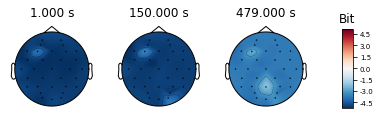

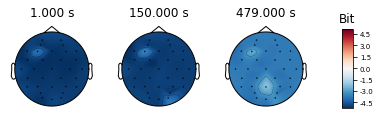

In [58]:
import mne
import numpy as np

# 假设您的数据存储在de变量中
# data = DE_alpha_array.copy()
info=rawcopy.info

# 将数据转换为evoked对象
evoked = mne.EvokedArray(data, info=info)

# 绘制脑地形图
evoked.plot_topomap(times=[1, 150, 479],units='Bit', scalings={'eeg': 1})


No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


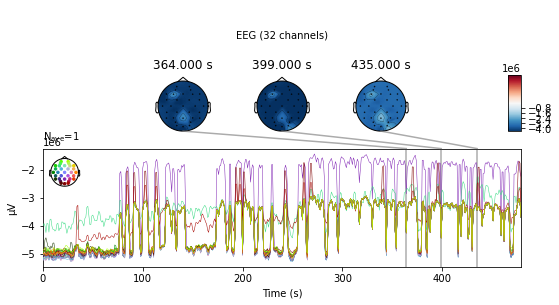

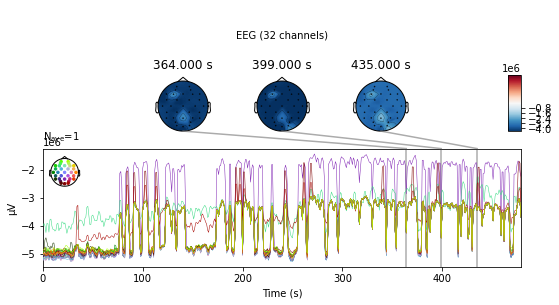

In [59]:
evoked.plot_joint()

In [42]:
print(evoked.times)

(480,)


In [36]:
###########第十一步
############################保存psd和de到excel
import pandas as pd

# 将numpy数组转换为DataFrame
df1 = pd.DataFrame(theta_psd)
df2 = pd.DataFrame(alpha_psd)
df3 = pd.DataFrame(beta_psd)
df4 = pd.DataFrame(gamma_psd)
# 文件路径
file_path1 ="D:/1yanjiushengwenxian/2023.6m/4w/theta_psd.xlsx"
file_path2 ="D:/1yanjiushengwenxian/2023.6m/4w/alpha_psd.xlsx"
file_path3 ="D:/1yanjiushengwenxian/2023.6m/4w/beta_psd.xlsx"
file_path4 ="D:/1yanjiushengwenxian/2023.6m/4w/gamma_psd.xlsx"

# 保存DataFrame为Excel文件
df1.to_excel(file_path1, index=False)
df2.to_excel(file_path2, index=False)
df3.to_excel(file_path3, index=False)
df4.to_excel(file_path4, index=False)

# 保存DE数据
DE_theta_array1=DE_theta_array.transpose([1,0])
DE_alpha_array1=DE_alpha_array.transpose([1,0])
DE_beta_array1=DE_beta_array.transpose([1,0])
DE_gamma_array1=DE_gamma_array.transpose([1,0])

df5 = pd.DataFrame(DE_theta_array1)
df6 = pd.DataFrame(DE_alpha_array1)
df7 = pd.DataFrame(DE_beta_array1)
df8 = pd.DataFrame(DE_gamma_array1)

file_path5 ="D:/1yanjiushengwenxian/2023.6m/4w/DE_theta_array1.xlsx"
file_path6 ="D:/1yanjiushengwenxian/2023.6m/4w/DE_alpha_array1.xlsx"
file_path7 ="D:/1yanjiushengwenxian/2023.6m/4w/DE_beta_array1.xlsx"
file_path8 ="D:/1yanjiushengwenxian/2023.6m/4w/DE_gamma_array1.xlsx"

df5.to_excel(file_path5, index=False)
df6.to_excel(file_path6, index=False)
df7.to_excel(file_path7, index=False)
df8.to_excel(file_path8, index=False)

In [14]:
############添加维度
temp_de= np.empty([0, 10315])
temp_de= np.vstack([temp_de, DE_theta_array])
temp_de= np.vstack([temp_de, DE_alpha_array])
temp_de= np.vstack([temp_de, DE_beta_array])
temp_de= np.vstack([temp_de, DE_gamma_array])
print(temp_de.shape)
temp_psd_de=np.vstack([temp_psd, temp_de])
temp_psd_de1= temp_psd_de.reshape(32,-1,10315)
print(temp_psd_de1.shape)

(128, 10315)
(32, 8, 10315)


In [15]:
temp_psd_de2=temp_psd_de1.transpose([2, 1, 0]).reshape(-1, 8, 32).reshape(-1, 256)
print(temp_psd_de2.shape)

(10315, 256)


In [16]:
import scipy.io as sio
result_dir =r"D:/1yanjiushengwenxian/2023.6m/2w/"
sio.savemat(result_dir + "PSD_DE",
                    {"data":temp_psd_de2,})

In [16]:
##################第十二步
##########################读取主观量表和RT数据
import pandas as pd
import numpy as np

df = pd.read_excel('D:/1yanjiushengwenxian/2023.6m/2w/datakssplus.xlsx', sheet_name='Sheet1', usecols=[1])
df1 = pd.read_excel('D:/1yanjiushengwenxian/2023.6m/2w/datakssplus.xlsx', sheet_name='Sheet1', usecols=[2])
df2 = pd.read_excel('D:/1yanjiushengwenxian/2023.6m/2w/datakssplus.xlsx', sheet_name='Sheet1', usecols=[3])
df3 = pd.read_excel('D:/1yanjiushengwenxian/2023.6m/2w/datakssplus.xlsx', sheet_name='Sheet1', usecols=[4])
KSS = np.array(df).flatten()
VALANCE = np.array(df1).flatten()
AROUSAL = np.array(df2).flatten()
DOMINNANT=np.array(df3).flatten()
print(KSS)
print(VALANCE)
print(AROUSAL)
print(DOMINNANT)
df4 = pd.read_excel('D:/1yanjiushengwenxian/2023.6m/2w/datakssplus.xlsx', sheet_name='Sheet2', usecols=[6], skiprows=0, nrows=62)
RT = np.array(df4).flatten()
print(RT,RT.shape)

[3 4 4 4 4 5 5 5 6 5 6 6 7 7 7 7 7 8]
[5 5 5 5 4 4 4 4 4 4 4 4 4 4 4 4 3 3]
[5 5 5 4 4 5 5 5 4 4 4 4 4 4 3 3 3 2]
[8 8 8 7 7 7 6 6 6 5 5 4 4 4 3 3 3 3]
[ 416  428  624  634  578  601  455  605  564  857  515  494  754  674
  819  548  455  476  677  465  544 1310  502  625  411  567  471  483
  569  648  557  486  737  436  524  616  483  521  484  608  489  676
  681  632 1107  636  562  541  637  788  588  662 1204  477  739  823
  527 1539  396  432  620  824] (62,)


In [19]:
###############第十三步
#################主观问卷和RT的线性插值
import numpy as np
from scipy.interpolate import interp1d

# 原始数据
x = np.arange(1, 19)
y = KSS  # 请替换为实际的18个y值
y1=VALANCE
y2=AROUSAL
y3=DOMINNANT

# 创建线性插值函数
interp_func = interp1d(x, y, kind='linear')
interp_func1 = interp1d(x, y1, kind='linear')
interp_func2 = interp1d(x, y2, kind='linear')
interp_func3 = interp1d(x, y3, kind='linear')

# 生成新的x坐标
new_x = np.linspace(1, 18, 10315)

# 进行线性插值
new_y = interp_func(new_x)
new_y1 = interp_func1(new_x)
new_y2 = interp_func2(new_x)
new_y3 = interp_func3(new_x)

print(new_y,new_y.shape)
print(new_y1,new_y1.shape)
print(new_y2,new_y2.shape)
print(new_y3,new_y3.shape)

x1 = np.arange(1, 63)
y4=RT
interp_func4 = interp1d(x1, y4, kind='linear')
new_x1 = np.linspace(1,62, 10315)
new_y4 = interp_func4(new_x1)
print(new_y4,new_y4.shape)

[3.         3.00164825 3.00329649 ... 7.99670351 7.99835175 8.        ] (10315,)
[5. 5. 5. ... 3. 3. 3.] (10315,)
[5.         5.         5.         ... 2.00329649 2.00164825 2.        ] (10315,)
[8. 8. 8. ... 3. 3. 3.] (10315,)
[416.         416.0709715  416.14194299 ... 821.58696917 822.79348458
 824.        ] (10315,)


In [20]:
###############第十四步
################将psdde和RT和KSS和SAM组合在一起
temp_fusion = np.empty([0, 10315])
temp_fusion = np.vstack([temp_fusion,temp_psd_de])
print(temp_fusion,temp_fusion.shape)

new_y00= new_y.reshape(-1,10315)
new_y11= new_y1.reshape(-1,10315)
new_y22= new_y2.reshape(-1,10315)
new_y33= new_y3.reshape(-1,10315)
new_y44= new_y4.reshape(-1,10315)

temp_fusion = np.vstack([temp_fusion,new_y00])
temp_fusion = np.vstack([temp_fusion,new_y11])
temp_fusion = np.vstack([temp_fusion,new_y22])
temp_fusion = np.vstack([temp_fusion,new_y33])
temp_fusion = np.vstack([temp_fusion,new_y44])
print(temp_fusion.shape)

temp_fusion=temp_fusion.transpose([1,0])
print(temp_fusion,temp_fusion.shape)

[[ 1.61171076e-11  3.75998992e-11  1.79140310e-10 ...  4.30101618e-10
   1.34704037e-09  1.66120855e-09]
 [ 1.59379335e-11  1.31623009e-11  8.88678172e-11 ...  5.58603166e-10
   8.35756506e-10  1.51644677e-09]
 [ 5.85613479e-12  6.89641113e-12  4.09781342e-11 ...  3.33983357e-10
   9.50349638e-10  1.57483749e-09]
 ...
 [-4.96231056e+00 -5.04049583e+00 -4.95422200e+00 ... -4.81920510e+00
  -4.58623523e+00 -4.75422516e+00]
 [-4.90779829e+00 -5.00511267e+00 -4.98318449e+00 ... -4.59380789e+00
  -4.51256136e+00 -4.65092670e+00]
 [-4.98250807e+00 -4.97594893e+00 -4.98064810e+00 ... -4.86501449e+00
  -4.66154749e+00 -4.76721307e+00]] (256, 10315)
(261, 10315)
[[1.61171076e-11 1.59379335e-11 5.85613479e-12 ... 5.00000000e+00
  8.00000000e+00 4.16000000e+02]
 [3.75998992e-11 1.31623009e-11 6.89641113e-12 ... 5.00000000e+00
  8.00000000e+00 4.16070971e+02]
 [1.79140310e-10 8.88678172e-11 4.09781342e-11 ... 5.00000000e+00
  8.00000000e+00 4.16141943e+02]
 ...
 [4.30101618e-10 5.58603166e-10 3.33

In [21]:
#################保存为utf-8测试一下TICC
np.savetxt('D:/1yanjiushengwenxian/2023.6m/4w/data.txt', temp_fusion, encoding='utf8', newline='\n', delimiter=',')

In [ ]:
#################最长公共子序列#############
li =[]

def lcs(a, b):
    lena = len(a)
    lenb = len(b)
    c = [[0 for i in range(lenb + 1)] for j in range(lena + 1)]
    flag = [[0 for i in range(lenb + 1)] for j in range(lena + 1)]
    for i in range(lena):
        for j in range(lenb):
            if a[i] == b[j]:
                c[i + 1][j + 1] = c[i][j] + 1
                flag[i + 1][j + 1] = 'ok'
            elif c[i + 1][j] > c[i][j + 1]:
                c[i + 1][j + 1] = c[i + 1][j]
                flag[i + 1][j + 1] = 'left'
            else:
                c[i + 1][j + 1] = c[i][j + 1]
                flag[i + 1][j + 1] = 'up'
    return c, flag


def printLcs(flag, a, i, j):
    if i == 0 or j == 0:
        return
    if flag[i][j] == 'ok':
        printLcs(flag, a, i - 1, j - 1)
        # print a[i - 1]
        li.append(a[i-1])
    elif flag[i][j] == 'left':
        printLcs(flag, a, i, j - 1)
    else:
        printLcs(flag, a, i - 1, j)


# a = 'ARWQRQBCBDASFJIOAAB'
# b = 'BDREQWTRCWABQRQWRQWRTYKOEQPA'

a = [1, 1, 2, 2, 3, 2, 2, 2, 3, 3, 3, 3, 4]
b = [1, 1,1, 1,2, 3, 3, 3]
#a、b表示两个mac在某段时间内的轨迹id序列

c, flag = lcs(a, b)
printLcs(flag, a, len(a), len(b))

print (li)
print (len(li))

In [34]:
import time
from sklearn import preprocessing
from scipy.signal import butter, lfilter
import scipy.io as sio
import numpy as np
import os
import math
import sys

def data_1Dto2D(data, Y=8, X=9):
    data_2D = np.zeros([Y, X])
    data_2D[0] = (0, 0, data[1], data[0], 0, data[16], data[17], 0, 0)
    data_2D[1] = (data[3], 0, data[2], 0, data[18], 0, data[19], 0, data[20])
    data_2D[2] = (0, data[4], 0, data[5], 0, data[22], 0, data[21], 0)
    data_2D[3] = (data[7], 0, data[6], 0, data[23], 0, data[24], 0, data[25])
    data_2D[4] = (0, data[8], 0, data[9], 0, data[27], 0, data[26], 0)
    data_2D[5] = (data[11], 0, data[10], 0, data[15], 0, data[28], 0, data[29])
    data_2D[6] = (0, 0, 0, data[12], 0, data[30], 0, 0, 0)
    data_2D[7] = (0, 0, 0, data[13], data[14], data[31], 0, 0, 0)
    # return shape:9*9
    return data_2D

def read_file(file):
    file = sio.loadmat(file)
    trial_data = file['data']
    return trial_data

path="D:/1yanjiushengwenxian/2023.6m/2w/PSD_DE"
trial_data= read_file(path)

# 沿着某个轴标准化数据集12。这里的参数axis=1表示沿着第二个维度（通道）进行标准化，with_mean=True表示要减去均值，with_std=True表示要除以标准差，copy=True表示要复制一份数据而不是直接修改原数据。
data = preprocessing.scale(trial_data, axis=1, with_mean=True, with_std=True, copy=True)

data_3D = np.empty([0, 8, 9])
sub_vector_len = 32

for vector in data:
    for band in range(0, 8):
        data_2D_temp = data_1Dto2D(vector[band * sub_vector_len:(band + 1) * sub_vector_len])
        data_2D_temp = data_2D_temp.reshape(1, 8, 9)
        # print("data_2d_temp shape:",data_2D_temp.shape)
        data_3D = np.vstack([data_3D, data_2D_temp])
data_3D = data_3D.reshape(-1, 8, 8, 9)
print("final data shape:", data_3D.shape)

final data shape: (10315, 8, 8, 9)


In [35]:
sio.savemat(result_dir+ "data3D" ,{"data3D": data_3D})

def get_segment_DE(x):
    stds = np.std(x, axis=1)
    DE = 0.5 * np.log10(2 * math.pi * math.exp(1) * (stds ** 2))
    DE = np.expand_dims(DE, axis=1)

    return DE

raw_theta_trial = raw_theta.copy().crop(tmin=t_min_trial, tmax=t_max_trial)
raw_alpha_trial = raw_alpha.copy().crop(tmin=t_min_trial, tmax=t_max_trial)
raw_beta_trial = raw_beta.copy().crop(tmin=t_min_trial, tmax=t_max_trial)
raw_gamma_trial = raw_gamma.copy().crop(tmin=t_min_trial, tmax=t_max_trial)

data_theta_trial = raw_theta_trial.get_data() * 1000000.0
data_alpha_trial = raw_alpha_trial.get_data() * 1000000.0
data_beta_trial = raw_beta_trial.get_data() * 1000000.0
data_gamma_trial = raw_gamma_trial.get_data() * 1000000.0
    
DE_trial_list = []

for t_1 in time_range:
    t_2 = t_1 + time_window
    DE_theta_trial = get_segment_DE(data_theta_trial[:, t_1:t_2])
    DE_slow_alpha_trial = get_segment_DE(data_slow_alpha_trial[:, t_1:t_2])
    DE_alpha_trial = get_segment_DE(data_alpha_trial[:, t_1:t_2])
    DE_beta_trial = get_segment_DE(data_beta_trial[:, t_1:t_2])
    DE_gamma_trial = get_segment_DE(data_gamma_trial[:, t_1:t_2])
    DE_trial = np.concatenate((DE_theta_trial, DE_slow_alpha_trial, DE_alpha_trial, DE_beta_trial, DE_gamma_trial),
                              axis=1)
    DE_trial_list.append(DE_trial)
DE_trial_list = np.array(DE_trial_list)
DE_trial_list = np.transpose(DE_trial_list, (1, 2, 0))



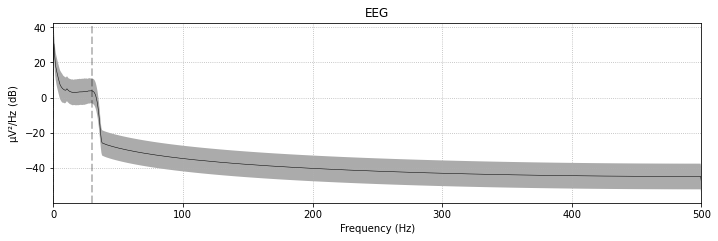

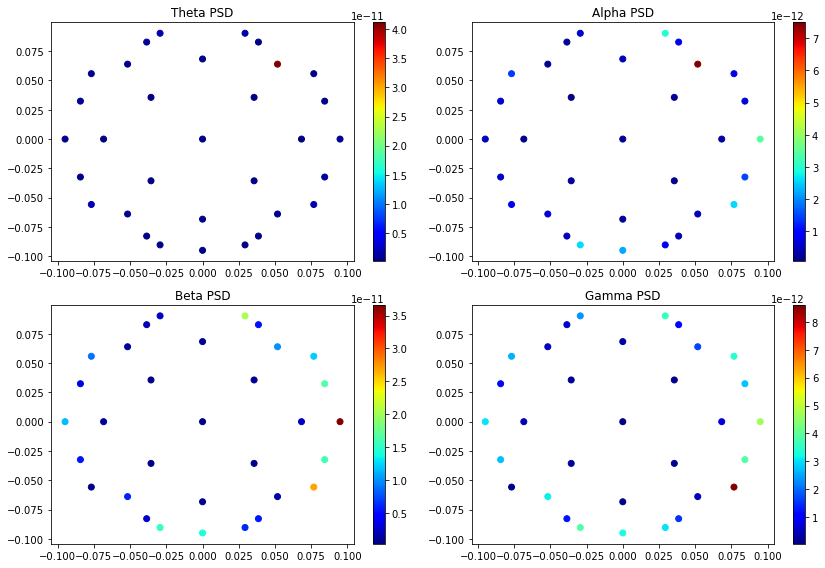

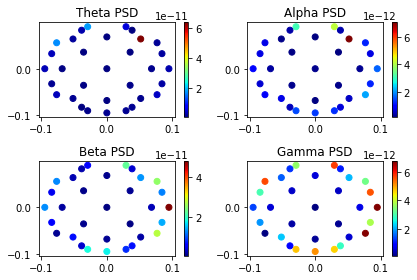

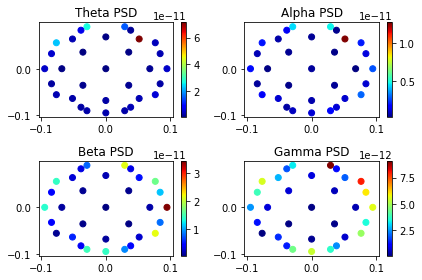

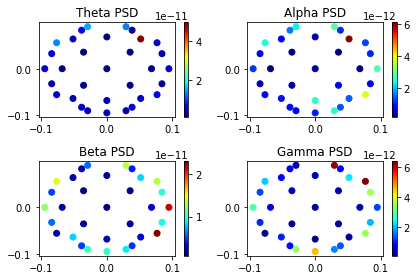

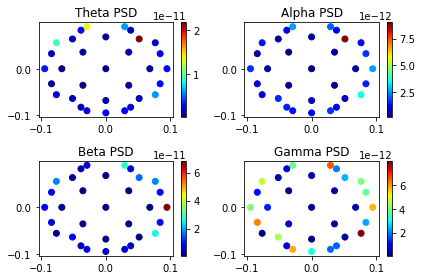

In [19]:
plt.figure(figsize=(12, 8))
for i in rangenb:
    if i<=4:
        # Theta波
        plt.subplot(2, 2, 1)
        plt.scatter(electrode_locations[:, 0], electrode_locations[:, 1], c=theta_psd[i,:], cmap='jet')
        plt.colorbar()
        plt.title('Theta PSD')
        
        # Alpha波
        plt.subplot(2, 2, 2)
        plt.scatter(electrode_locations[:, 0], electrode_locations[:, 1], c=alpha_psd[i,:], cmap='jet')
        plt.colorbar()
        plt.title('Alpha PSD')

        # Beta波
        plt.subplot(2, 2, 3)
        plt.scatter(electrode_locations[:, 0], electrode_locations[:, 1], c=beta_psd[i,:], cmap='jet')
        plt.colorbar()
        plt.title('Beta PSD')

        # Gamma波
        plt.subplot(2, 2, 4)
        plt.scatter(electrode_locations[:, 0], electrode_locations[:, 1], c=gamma_psd[i,:], cmap='jet')
        plt.colorbar()
        plt.title('Gamma PSD')
        
        plt.tight_layout()
        plt.show()

clean_DEAP代码中的psd绘制
import matplotlib
matplotlib.use('TkAgg')这句不好用
ch_names = raw.ch_names
eeg_channels = ch_names[:32]
fig = raw.plot_psd(fmin=4, fmax=45, area_mode='range', average=False, picks=eeg_channels,
                                            spatial_colors=True)

4DCNN_main

In [24]:
import numpy as np
import scipy.io as sio
import os
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from keras.layers import Input, Conv2D, MaxPooling2D, Dropout
from keras.layers import Flatten, Dense, Concatenate, Reshape, LSTM
from keras.models import Sequential, Model

import keras
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "1"
from keras import backend as K
import time
from sklearn.model_selection import StratifiedKFold


# 每次训练时输入网络的样本数量，根据情况调整
batch_size = 128
img_rows, img_cols, num_chan = 8, 9, 8

acc_list = []
std_list = []
all_acc = []

读取疲劳标签，转换为二进制

In [21]:
# 分类数
num_classes = 4
fatigue = np.loadtxt(r'D:\1yanjiushengwenxian\2023.6m\2w\Results.txt')
print(fatigue)

[0. 0. 0. ... 2. 2. 2.]


In [31]:
fatigue[6] = 2 
fatigue[7] = 2 
print(fatigue) 

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.
 3. 3. 3. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 3. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [22]:
# 得到所有元素在列表中的位置和数量
result = {} # 创建一个空字典来存储结果
for i in range(len(fatigue)): # 遍历数据的长度
    ele = fatigue[i] # 取出数据中的每个元素
    if ele not in result: # 如果该元素不在字典中
        result[ele] = [[], 0] # 创建一个键值对，值为一个包含两个空列表的列表
    result[ele][0].append(i) # 将该元素的索引添加到第一个子列表中
    result[ele][1] += 1 # 将该元素的次数加一

for key in result: # 遍历字典中的每个键
    print(key, "所在的位置:", result[key][0], "数量:", result[key][1])

0.0 所在的位置: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

In [25]:
# 转化为2进制？？
y_fatigue = to_categorical(fatigue, num_classes)
print(y_fatigue,y_fatigue.shape)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]] (10315, 4)


In [38]:
#############测试
dataset_dir = "D:/1yanjiushengwenxian/2023.6m/2w/"
file_path = os.path.join(dataset_dir, 'data3D')
print(file_path)
file = sio.loadmat(file_path)
data4D = file['data3D']
print(data4D.shape)
one_falx = data4D.transpose([0, 2, 3, 1])
print(one_falx.shape)
one_falx = one_falx.reshape((-1, 5, img_rows, img_cols, num_chan))
print(num_chan)
print(one_falx.shape)

D:/1yanjiushengwenxian/2023.6m/2w/data3D
(10315, 8, 8, 9)
(10315, 8, 9, 8)
8
(2063, 5, 8, 9, 8)


In [40]:
#############t=..以..个采样点作为时间窗口对数据分析
dataset_dir = "D:/1yanjiushengwenxian/2023.6m/2w/"
K.clear_session()
t=5
file_path = os.path.join(dataset_dir, 'data3D')
file = sio.loadmat(file_path)
data4D = file['data3D']
one_falx = data4D.transpose([0, 2, 3, 1])
one_falx = one_falx.reshape((-1, 5, img_rows, img_cols, num_chan))
print(one_falx.shape)

one_y_fatigue = np.empty([0,4])
for j in range(int(len(y_fatigue)//t)):
    one_y_fatigue = np.vstack((one_y_fatigue,y_fatigue[j*t]))
print(one_y_fatigue.shape)

(2063, 5, 8, 9, 8)
(2063, 4)


In [43]:
start = time.time()
print("\nprocessing: ", "......")

seed = 7
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, test in kfold.split(one_falx,one_y_fatigue.argmax(1)):
    img_size = (img_rows, img_cols, num_chan)

    def create_base_network(input_dim):
        seq = Sequential()
        # 创建一个顺序模型，可以将多个网络层线性堆叠起来
        seq.add(Conv2D(64, 5, activation='relu', padding='same', name='conv1', input_shape=input_dim))
        seq.add(Conv2D(128, 4, activation='relu', padding='same', name='conv2'))
        seq.add(Conv2D(256, 4, activation='relu', padding='same', name='conv3'))
        seq.add(Conv2D(64, 1, activation='relu', padding='same', name='conv4'))
        # 添加一个二维卷积层，有64个过滤器，过滤器大小为5x5，激活函数为relu，填充方式为same，层的名字为conv1，输入数据的形状为input_dim
        seq.add(MaxPooling2D(2, 2, name='pool1'))
        # 添加一个最大池化层，池化窗口大小为2x2，步长为2x2，层的名字为pool1
        seq.add(Flatten(name='fla1'))
        # 添加一个展平层，将多维的输入一维化，方便全连接层的处理，层的名字为fla1
        seq.add(Dense(512, activation='relu', name='dense1'))
        # 添加一个全连接层，有512个神经元，激活函数为relu，层的名字为dense1
        seq.add(Reshape((1, 512), name='reshape'))
        # 添加一个重塑层，将输入重塑为1x512的形状，方便后续的操作，层的名字为reshape
        return seq

    # 创造...个8x9x4的CNN模型的输入
    base_network = create_base_network(img_size)
    input_1 = Input(shape=img_size)
    input_2 = Input(shape=img_size)
    input_3 = Input(shape=img_size)
    input_4 = Input(shape=img_size)
    input_5 = Input(shape=img_size)
   
    # 这一行定义了一个连接层，用于将...个输入层经过基础网络后得到的特征向量沿着第二维度拼接起来，形成一个二维的张量。
    out_all = Concatenate(axis=1)([base_network(input_1), base_network(input_2), base_network(input_3), base_network(input_4), base_network(input_5)])
    # 添加一个LSTM层，有128个隐藏单元，层的名字为lstm,LSTM层内部会自动定义遗忘门、输入门和输出门，并根据公式进行更新。
    lstm_layer = LSTM(128, name='lstm')(out_all)
    # 添加一个全连接层，有4个神经元，4分类,激活函数为softmax，层的名字为out,
    # 全连接层会对LSTM层的输出进行线性变换和softmax操作，得到每个类别的概率分布。
    out_layer = Dense(4, activation='softmax', name='out')(lstm_layer)
    # 定义了整个模型，将...个输入层和最后一个输出层作为参数传入Model类中，创建一个Keras模型对象。
    model = Model([input_1, input_2, input_3, input_4, input_5], out_layer)
    # 打印出模型的结构和参数信息
    model.summary()

    # Compile model,设置损失函数为分类交叉熵，用于衡量模型的预测和真实标签之间的差异,设置优化器为Adam，用于更新模型的参数以最小化损失函数
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adam(),
                  metrics=['accuracy'])  # 设置评估指标为准确率，用于衡量模型的预测和真实标签之间的一致性

    # Fit the model,使用训练集数据来训练模型，并使用测试集数据来评估模型的性能
    x_train = one_falx[train]
    # 获取训练集的特征数据，赋值给x_train
    y_train = one_y_fatigue[train]

    model.fit([x_train[:, 0], x_train[:, 1], x_train[:, 2], x_train[:, 3], x_train[:, 4]], y_train, epochs=300, batch_size=128, verbose=1)
    # 使用模型的fit方法，将训练集的特征和标签作为输入，设置迭代次数为100，批量大小为64：每次迭代使用64个样本进行权重更新，打印训练过程

    x_test = one_falx[test]
    y_test = one_y_fatigue[test]
    scores = model.evaluate([x_test[:, 0], x_test[:, 1], x_test[:, 2], x_test[:, 3], x_test[:, 4]], y_test, verbose=1)
    # 使用模型的evaluate方法，将测试集的特征和标签作为输入，不打印评估过程，返回模型的损失和准确率，赋值给scores
    # verbose 是一个参数，它表示训练过程中的输出信息的形式，0 表示不输出，1 表示进度条，2 表示每轮一行。
    print("%.2f%%" % (scores[1] * 100))
    # 打印模型在测试集上的准确率，保留两位小数
    all_acc.append(scores[1] * 100)
    # 将模型在测试集上的准确率添加到all_acc列表中

# print("all acc: {}".format(all_acc))
print("mean acc: {}".format(np.mean(all_acc)))
print("std acc: {}".format(np.std(all_acc)))
acc_list.append(np.mean(all_acc))
std_list.append(np.std(all_acc))
all_acc = []
end = time.time()              
print("%.2f" % (end - start))



processing:  ......
Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_21 (InputLayer)          [(None, 8, 9, 8)]    0           []                               
                                                                                                  
 input_22 (InputLayer)          [(None, 8, 9, 8)]    0           []                               
                                                                                                  
 input_23 (InputLayer)          [(None, 8, 9, 8)]    0           []                               
                                                                                                  
 input_24 (InputLayer)          [(None, 8, 9, 8)]    0           []                               
                                                                       

13/13 [==============================] - 18s 1s/step - loss: 0.1226 - accuracy: 0.9673
Epoch 133/300
13/13 [==============================] - 18s 1s/step - loss: 0.1086 - accuracy: 0.9758
Epoch 134/300
13/13 [==============================] - 18s 1s/step - loss: 0.1448 - accuracy: 0.9618
Epoch 135/300
13/13 [==============================] - 18s 1s/step - loss: 0.1181 - accuracy: 0.9679
Epoch 136/300
13/13 [==============================] - 18s 1s/step - loss: 0.0936 - accuracy: 0.9782
Epoch 137/300
13/13 [==============================] - 18s 1s/step - loss: 0.0827 - accuracy: 0.9873
Epoch 138/300
13/13 [==============================] - 18s 1s/step - loss: 0.0627 - accuracy: 0.9939
Epoch 139/300
13/13 [==============================] - 18s 1s/step - loss: 0.0528 - accuracy: 0.9952
Epoch 140/300
13/13 [==============================] - 18s 1s/step - loss: 0.0391 - accuracy: 0.9988
Epoch 141/300
13/13 [==============================] - 18s 1s/step - loss: 0.0321 - accuracy: 0.9982
Epoc

13/13 [==============================] - 23s 2s/step - loss: 3.1455e-04 - accuracy: 1.0000
Epoch 292/300
13/13 [==============================] - 21s 2s/step - loss: 3.1062e-04 - accuracy: 1.0000
Epoch 293/300
13/13 [==============================] - 20s 2s/step - loss: 3.0752e-04 - accuracy: 1.0000
Epoch 294/300
13/13 [==============================] - 20s 2s/step - loss: 3.0200e-04 - accuracy: 1.0000
Epoch 295/300
13/13 [==============================] - 20s 2s/step - loss: 2.9745e-04 - accuracy: 1.0000
Epoch 296/300
13/13 [==============================] - 21s 2s/step - loss: 2.9327e-04 - accuracy: 1.0000
Epoch 297/300
13/13 [==============================] - 20s 2s/step - loss: 2.8984e-04 - accuracy: 1.0000
Epoch 298/300
13/13 [==============================] - 22s 2s/step - loss: 2.8797e-04 - accuracy: 1.0000
Epoch 299/300
13/13 [==============================] - 20s 2s/step - loss: 2.8379e-04 - accuracy: 1.0000
Epoch 300/300
13/13 [==============================] - 2s 88ms/step -

13/13 [==============================] - 17s 1s/step - loss: 0.6499 - accuracy: 0.7139
Epoch 41/300
13/13 [==============================] - 17s 1s/step - loss: 0.6564 - accuracy: 0.7048
Epoch 42/300
13/13 [==============================] - 17s 1s/step - loss: 0.6534 - accuracy: 0.7127
Epoch 43/300
13/13 [==============================] - 17s 1s/step - loss: 0.6519 - accuracy: 0.7224
Epoch 44/300
13/13 [==============================] - 17s 1s/step - loss: 0.6460 - accuracy: 0.7164
Epoch 45/300
13/13 [==============================] - 17s 1s/step - loss: 0.6739 - accuracy: 0.7097
Epoch 46/300
13/13 [==============================] - 17s 1s/step - loss: 0.6610 - accuracy: 0.7127
Epoch 47/300
13/13 [==============================] - 17s 1s/step - loss: 0.6696 - accuracy: 0.6982
Epoch 48/300
13/13 [==============================] - 17s 1s/step - loss: 0.6916 - accuracy: 0.6867
Epoch 49/300
13/13 [==============================] - 17s 1s/step - loss: 0.6231 - accuracy: 0.7291
Epoch 50/300


13/13 [==============================] - 17s 1s/step - loss: 0.0015 - accuracy: 1.0000
Epoch 203/300
13/13 [==============================] - 17s 1s/step - loss: 0.0014 - accuracy: 1.0000
Epoch 204/300
13/13 [==============================] - 17s 1s/step - loss: 0.0014 - accuracy: 1.0000
Epoch 205/300
13/13 [==============================] - 17s 1s/step - loss: 0.0014 - accuracy: 1.0000
Epoch 206/300
13/13 [==============================] - 17s 1s/step - loss: 0.0013 - accuracy: 1.0000
Epoch 207/300
13/13 [==============================] - 17s 1s/step - loss: 0.0013 - accuracy: 1.0000
Epoch 208/300
13/13 [==============================] - 17s 1s/step - loss: 0.0012 - accuracy: 1.0000
Epoch 209/300
13/13 [==============================] - 17s 1s/step - loss: 0.0012 - accuracy: 1.0000
Epoch 210/300
13/13 [==============================] - 17s 1s/step - loss: 0.0012 - accuracy: 1.0000
Epoch 211/300
13/13 [==============================] - 17s 1s/step - loss: 0.0012 - accuracy: 1.0000
Epoc

13/13 [==============================] - 17s 1s/step - loss: 0.7065 - accuracy: 0.6921
Epoch 29/300
13/13 [==============================] - 18s 1s/step - loss: 0.7179 - accuracy: 0.6770
Epoch 30/300
13/13 [==============================] - 18s 1s/step - loss: 0.7045 - accuracy: 0.6891
Epoch 31/300
13/13 [==============================] - 17s 1s/step - loss: 0.7126 - accuracy: 0.6927
Epoch 32/300
13/13 [==============================] - 17s 1s/step - loss: 0.7111 - accuracy: 0.6909
Epoch 33/300
13/13 [==============================] - 17s 1s/step - loss: 0.7053 - accuracy: 0.6855
Epoch 34/300
13/13 [==============================] - 17s 1s/step - loss: 0.6562 - accuracy: 0.7103
Epoch 35/300
13/13 [==============================] - 17s 1s/step - loss: 0.6901 - accuracy: 0.7006
Epoch 36/300
13/13 [==============================] - 17s 1s/step - loss: 0.6846 - accuracy: 0.6945
Epoch 37/300
13/13 [==============================] - 18s 1s/step - loss: 0.6919 - accuracy: 0.6988
Epoch 38/300


13/13 [==============================] - 17s 1s/step - loss: 0.0053 - accuracy: 1.0000
Epoch 191/300
13/13 [==============================] - 17s 1s/step - loss: 0.0049 - accuracy: 1.0000
Epoch 192/300
13/13 [==============================] - 17s 1s/step - loss: 0.0048 - accuracy: 1.0000
Epoch 193/300
13/13 [==============================] - 17s 1s/step - loss: 0.0047 - accuracy: 1.0000
Epoch 194/300
13/13 [==============================] - 18s 1s/step - loss: 0.0045 - accuracy: 1.0000
Epoch 195/300
13/13 [==============================] - 17s 1s/step - loss: 0.0044 - accuracy: 1.0000
Epoch 196/300
13/13 [==============================] - 17s 1s/step - loss: 0.0042 - accuracy: 1.0000
Epoch 197/300
13/13 [==============================] - 17s 1s/step - loss: 0.0041 - accuracy: 1.0000
Epoch 198/300
13/13 [==============================] - 17s 1s/step - loss: 0.0039 - accuracy: 1.0000
Epoch 199/300
13/13 [==============================] - 17s 1s/step - loss: 0.0037 - accuracy: 1.0000
Epoc

13/13 [==============================] - 18s 1s/step - loss: 0.7683 - accuracy: 0.6651
Epoch 19/300
13/13 [==============================] - 18s 1s/step - loss: 0.7580 - accuracy: 0.6796
Epoch 20/300
13/13 [==============================] - 18s 1s/step - loss: 0.7743 - accuracy: 0.6675
Epoch 21/300
13/13 [==============================] - 18s 1s/step - loss: 0.7791 - accuracy: 0.6675
Epoch 22/300
13/13 [==============================] - 18s 1s/step - loss: 0.7534 - accuracy: 0.6778
Epoch 23/300
13/13 [==============================] - 18s 1s/step - loss: 0.7414 - accuracy: 0.6717
Epoch 24/300
13/13 [==============================] - 18s 1s/step - loss: 0.7519 - accuracy: 0.6808
Epoch 25/300
13/13 [==============================] - 18s 1s/step - loss: 0.7277 - accuracy: 0.6881
Epoch 26/300
13/13 [==============================] - 18s 1s/step - loss: 0.7535 - accuracy: 0.6651
Epoch 27/300
13/13 [==============================] - 18s 1s/step - loss: 0.7092 - accuracy: 0.6996
Epoch 28/300


13/13 [==============================] - 18s 1s/step - loss: 0.4731 - accuracy: 0.7904
Epoch 101/300
13/13 [==============================] - 18s 1s/step - loss: 0.4867 - accuracy: 0.7747
Epoch 102/300
13/13 [==============================] - 18s 1s/step - loss: 0.5188 - accuracy: 0.7704
Epoch 103/300
13/13 [==============================] - 18s 1s/step - loss: 0.5059 - accuracy: 0.7650
Epoch 104/300
13/13 [==============================] - 18s 1s/step - loss: 0.5095 - accuracy: 0.7686
Epoch 105/300
13/13 [==============================] - 18s 1s/step - loss: 0.4906 - accuracy: 0.7795
Epoch 106/300
13/13 [==============================] - 18s 1s/step - loss: 0.5096 - accuracy: 0.7795
Epoch 107/300
13/13 [==============================] - 18s 1s/step - loss: 0.5085 - accuracy: 0.7832
Epoch 108/300
13/13 [==============================] - 18s 1s/step - loss: 0.5043 - accuracy: 0.7723
Epoch 109/300
13/13 [==============================] - 18s 1s/step - loss: 0.4944 - accuracy: 0.7820
Epoc

13/13 [==============================] - 18s 1s/step - loss: 4.0366e-04 - accuracy: 1.0000
Epoch 261/300
13/13 [==============================] - 18s 1s/step - loss: 3.9461e-04 - accuracy: 1.0000
Epoch 262/300
13/13 [==============================] - 18s 1s/step - loss: 3.9062e-04 - accuracy: 1.0000
Epoch 263/300
13/13 [==============================] - 18s 1s/step - loss: 3.8372e-04 - accuracy: 1.0000
Epoch 264/300
13/13 [==============================] - 18s 1s/step - loss: 3.7749e-04 - accuracy: 1.0000
Epoch 265/300
13/13 [==============================] - 18s 1s/step - loss: 3.7212e-04 - accuracy: 1.0000
Epoch 266/300
13/13 [==============================] - 18s 1s/step - loss: 3.6888e-04 - accuracy: 1.0000
Epoch 267/300
13/13 [==============================] - 18s 1s/step - loss: 3.6158e-04 - accuracy: 1.0000
Epoch 268/300
13/13 [==============================] - 18s 1s/step - loss: 3.5654e-04 - accuracy: 1.0000
Epoch 269/300
13/13 [==============================] - 18s 1s/step - 

13/13 [==============================] - 18s 1s/step - loss: 0.5655 - accuracy: 0.7608
Epoch 90/300
13/13 [==============================] - 18s 1s/step - loss: 0.5662 - accuracy: 0.7553
Epoch 91/300
13/13 [==============================] - 18s 1s/step - loss: 0.5867 - accuracy: 0.7408
Epoch 92/300
13/13 [==============================] - 18s 1s/step - loss: 0.5733 - accuracy: 0.7541
Epoch 93/300
13/13 [==============================] - 18s 1s/step - loss: 0.5509 - accuracy: 0.7547
Epoch 94/300
13/13 [==============================] - 18s 1s/step - loss: 0.5834 - accuracy: 0.7389
Epoch 95/300
13/13 [==============================] - 18s 1s/step - loss: 0.5731 - accuracy: 0.7480
Epoch 96/300
13/13 [==============================] - 18s 1s/step - loss: 0.5765 - accuracy: 0.7614
Epoch 97/300
13/13 [==============================] - 18s 1s/step - loss: 0.5488 - accuracy: 0.7535
Epoch 98/300
13/13 [==============================] - 18s 1s/step - loss: 0.5657 - accuracy: 0.7595
Epoch 99/300


Epoch 251/300
13/13 [==============================] - 18s 1s/step - loss: 8.5388e-04 - accuracy: 1.0000
Epoch 252/300
13/13 [==============================] - 18s 1s/step - loss: 8.4612e-04 - accuracy: 1.0000
Epoch 253/300
13/13 [==============================] - 18s 1s/step - loss: 8.2375e-04 - accuracy: 1.0000
Epoch 254/300
13/13 [==============================] - 18s 1s/step - loss: 8.1188e-04 - accuracy: 1.0000
Epoch 255/300
13/13 [==============================] - 18s 1s/step - loss: 7.9593e-04 - accuracy: 1.0000
Epoch 256/300
13/13 [==============================] - 18s 1s/step - loss: 7.7733e-04 - accuracy: 1.0000
Epoch 257/300
13/13 [==============================] - 18s 1s/step - loss: 7.6428e-04 - accuracy: 1.0000
Epoch 258/300
13/13 [==============================] - 18s 1s/step - loss: 7.4828e-04 - accuracy: 1.0000
Epoch 259/300
13/13 [==============================] - 17s 1s/step - loss: 7.3260e-04 - accuracy: 1.0000
Epoch 260/300
13/13 [==============================] - 

In [44]:
# 对新的数据进行分类处理
y_pred = model.predict([x_test[:, 0], x_test[:, 1], x_test[:, 2], x_train[:, 3], x_train[:, 4]])

# 可以用argmax方法来获取每个样本的最大概率对应的类别
labels = np.argmax(predictions, axis=1)
# labels是一个一维数组，表示每个样本的预测类别


ValueError: Data cardinality is ambiguous:
  x sizes: 412, 412, 412, 1651, 1651
Make sure all arrays contain the same number of samples.

In [44]:
img_rows, img_cols, num_chan = 8, 9, 4
seed = 7
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, test in kfold.split(one_falx, one_y.argmax(1)):
    img_size = (img_rows, img_cols, num_chan)
    def create_base_network(input_dim):
        seq = Sequential()
        
        seq.add(Conv2D(64, 5, activation='relu', padding='same', name='conv1', input_shape=input_dim))
        seq.add(Conv2D(128, 4, activation='relu', padding='same', name='conv2'))
        seq.add(Conv2D(256, 4, activation='relu', padding='same', name='conv3'))
        seq.add(Conv2D(64, 1, activation='relu', padding='same', name='conv4'))
       
        seq.add(MaxPooling2D(2, 2, name='pool1'))
        
        seq.add(Flatten(name='fla1'))
        
        seq.add(Dense(512, activation='relu', name='dense1'))
        
        seq.add(Reshape((1, 512), name='reshape'))
        
        return seq
    base_network = create_base_network(img_size)
    input_1 = Input(shape=img_size)
    input_2 = Input(shape=img_size)
    input_3 = Input(shape=img_size)
    input_4 = Input(shape=img_size)
    input_5 = Input(shape=img_size)
    input_6 = Input(shape=img_size)
    out_all = Concatenate(axis=1)([base_network(input_1), base_network(input_2), base_network(input_3), base_network(input_4), base_network(input_5), base_network(input_6)])
    lstm_layer = LSTM(128, name='lstm')(out_all)
    out_layer = Dense(4, activation='softmax', name='out')(lstm_layer)
    model = Model([input_1, input_2, input_3, input_4, input_5, input_6], out_layer)
    model.summary()
    model.compile(loss=keras.losses.categorical_crossentropy,
                      optimizer=keras.optimizers.Adam(),
                      metrics=['accuracy'])
    x_train = one_falx[train]
    y_train = one_y[train]
    model.fit([x_train[:, 0], x_train[:, 1], x_train[:, 2], x_train[:, 3], x_train[:, 4], x_train[:, 5]], y_train, epochs=100, batch_size=64, verbose=0)
    x_test = one_falx[test]
    y_test = one_y[test]
    scores = model.evaluate([x_test[:, 0], x_test[:, 1], x_test[:, 2], x_test[:, 3], x_test[:, 4], x_test[:, 5]], y_test, verbose=0)
        

[1, 1, 2, 3, 3, 3]
6
